In [119]:
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (12,5)

## Audio Features

In [120]:
train_audio_path = "D:\\ml_code\\keras\\urban_sound\\Train\\"
train_csv_path =  "D:\\ml_code\\keras\\urban_sound\\train.csv"

In [121]:
ipd.Audio(train_audio_path+'22.mp3' )

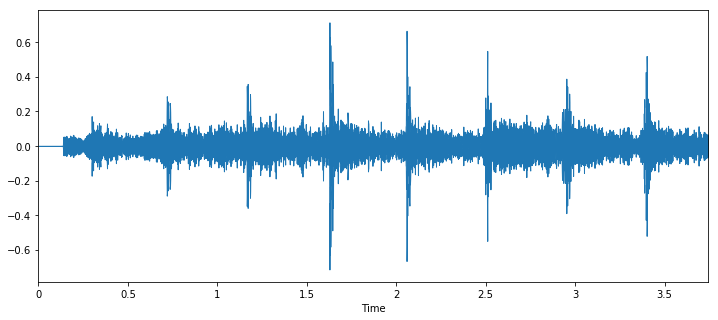

In [122]:
x, sr = librosa.load(train_audio_path+'22.mp3')
librosa.display.waveplot(x,sr=sr)
plt.show()

## Zero Crossing Rate

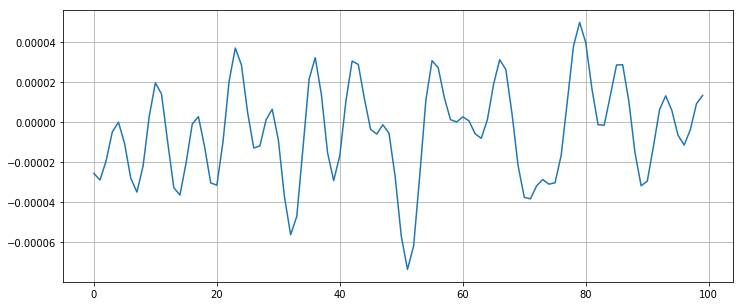

In [123]:
plt.plot(x[1000:1100])
plt.grid()

In [124]:
n_cross = librosa.zero_crossings(x[1000:1100],pad=False)
n_cross.sum()

25

## Spectral Centroids

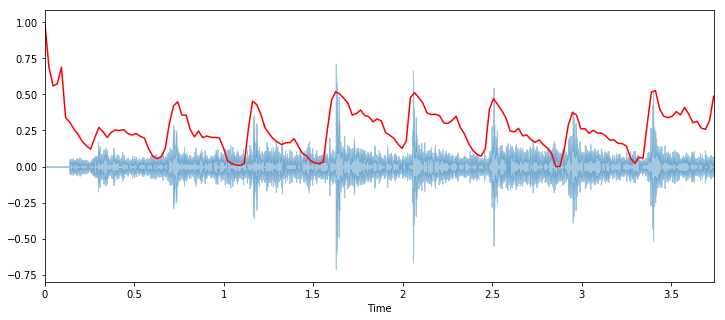

In [130]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

#delay incurred by converting to mp3 file from wav

## Spectral Rolloff
Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

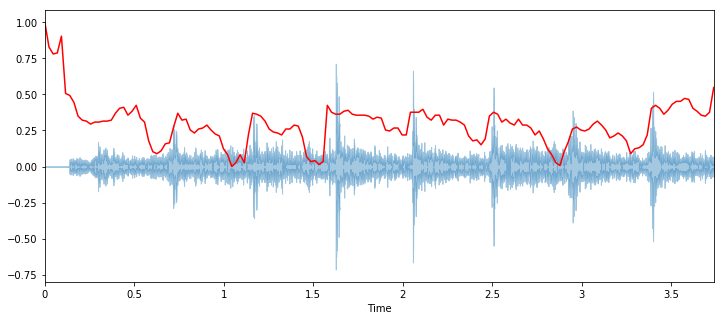

In [132]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r');

## MFCC — Mel-Frequency Cepstral Coefficients
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

There are 20 mfccs for each of the 162 frames of audio


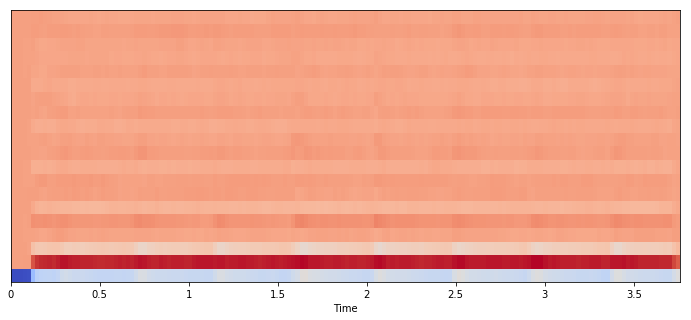

In [137]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print("There are {} mfccs for each of the {} frames of audio".format(mfccs.shape[0],mfccs.shape[1]))

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time');

## Spectogram
A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals.

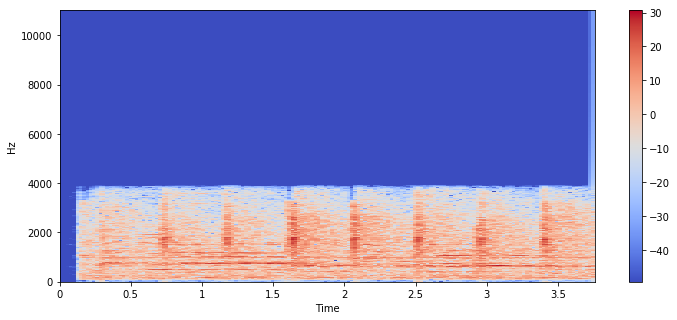

In [139]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 

#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

In [140]:
sr

22050